In [3]:
import pandas as pd
import numpy as np
import os
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model
#from keras.preprocessing.image import load_img
##from keras.preprocessing.image import img_to_array
#from keras.preprocessing.image import array_to_img
from  matplotlib import pyplot as plt

import tensorflow as tf
import os
import PIL
import tensorflow as tf
import cv2

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
%matplotlib inline

Using TensorFlow backend.


In [7]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'C:\data\CV\Intel_Images\seg_train\seg_train'

In [8]:
import matplotlib.image as mpimg

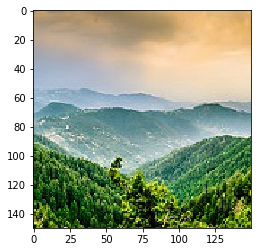

In [9]:

test_image=r'C:\data\CV\Intel_Images\seg_train\seg_train\mountain\480.jpg'

img=mpimg.imread(test_image)
plt.imshow(img)

## https://keras.io/api/preprocessing/image/
## https://www.tensorflow.org/tutorials/load_data/images

In [18]:

def create_dataset_tf(img_folder):
    class_name=[]
    tf_img_data_array=[]   
    
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
            image= os.path.join(img_folder,dir1, file)
            image = tf.io.read_file(image)
            image = tf.io.decode_jpeg(image, channels=3)
            image = tf.image.resize(image, (200,200))
            image = tf.cast(image / 255., tf.float32)
            tf_img_data_array.append(image)
            class_name.append(dir1)                   
    return tf.stack(tf_img_data_array, axis=0),class_name

In [19]:
img_folder=r'C:\data\CV\Intel_Images\seg_train\seg_train'
tf_img_data, class_name=create_dataset_tf(img_folder)

In [20]:
print(type(tf_img_data))
print(type(class_name))


<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'list'>


In [22]:

target_dict={k: v for v, k in enumerate(np.unique(class_name))}
target_dict


{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [23]:

target_val=  [target_dict[class_name[i]] for i in range(len(class_name))]

In [24]:
model=tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(200, 200, 3)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(32)])



In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 99, 99, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 153664)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                4917280   
Total params: 4,936,672
Trainable params: 4,936,672
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [28]:
type(tf_img_data)

tensorflow.python.framework.ops.EagerTensor

In [29]:

history = model.fit(x=tf_img_data, y=tf.cast(list(map(int,target_val)),tf.int32), epochs=2)


Train on 14034 samples
Epoch 1/2
14034/14034 [==============================] - 69s 5ms/sample - loss: 9.2072 - accuracy: 0.1723
Epoch 2/2
14034/14034 [==============================] - 67s 5ms/sample - loss: 9.2036 - accuracy: 0.1730
